# Kaggle fake news dataset
https://www.kaggle.com/competitions/fake-news/data?select=train.csv

# & Compiled dataset

Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Load + merge dataset & clean 'NaN'

In [ ]:
true_general_path = '/content/drive/MyDrive/Seachain/Compiled Datasets/True/true_general.csv'
fake_general_path = '/content/drive/MyDrive/Seachain/Compiled Datasets/Fake/fake_General.csv'
fake_general2_path = '/content/drive/MyDrive/Seachain/Compiled Datasets/Fake/fake_General_2.csv'

true_general_df = pd.read_csv(true_general_path, encoding='utf-8', on_bad_lines='skip', engine="python")
true_general_df['label'] = 1

fake_general_df = pd.read_csv(fake_general_path, encoding='utf-8', on_bad_lines='skip', engine="python")
fake_general_df['label'] = 0

fake_general2_df = pd.read_csv(fake_general2_path, encoding='utf-8', on_bad_lines='skip', engine="python")
fake_general2_df['label'] = 0

general_df = pd.concat([true_general_df, fake_general_df, fake_general2_df], ignore_index=True)
general_df.fillna('', inplace=True)
general_df.head()

,Unnamed: 0,id,title,author,text,label,subject,date
0,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1,,
1,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",1,,
2,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",1,,
3,8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,1,,
4,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,1,,


In [ ]:
true_politics_path = '/content/drive/MyDrive/Seachain/Compiled Datasets/True/true_politics.csv'
fake_politics_path = '/content/drive/MyDrive/Seachain/Compiled Datasets/Fake/fake_politics.csv'

true_politics_df = pd.read_csv(true_politics_path, encoding='utf-8', on_bad_lines='skip', engine="python")
true_politics_df['label'] = 1
fake_politics_df = pd.read_csv(fake_politics_path, encoding='utf-8', on_bad_lines='skip', engine="python")
fake_politics_df['label'] = 0
politics_df = pd.concat([true_politics_df, fake_politics_df], ignore_index=True)
politics_df['author'] = ''
politics_df.fillna('', inplace=True)
politics_df.head()

,Unnamed: 0,title,text,subject,date,label,author
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,


In [ ]:
# train_df = pd.read_csv('train_csv', encoding='utf-8', error_bad_lines = False, engine='python')


<ipython-input-7-056dfc14bdf3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv('train_csv', encoding='utf-8', error_bad_lines = False, engine='python')


FileNotFoundError: ignored

## Data cleaning

1. Remove URLs

In [ ]:
columns = ['title', 'author', 'text']
dfs = [general_df, politics_df]

def apply_function(col_list, df_list, fx):
  for i in col_list:
    for j in df_list:
      j[i] = j[i].apply(fx)

In [ ]:
def cleaning_URLs(data):
    return re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)', ' ', data)

In [ ]:
apply_function(columns, dfs, cleaning_URLs)

In [ ]:
general_df.head()

,Unnamed: 0,id,title,author,text,label,subject,date
0,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1,,
1,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",1,,
2,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",1,,
3,8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,1,,
4,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,1,,


In [ ]:
politics_df.head()

,Unnamed: 0,title,text,subject,date,label,author
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,


2. Convert to lowercase, remove puncutations & repeating characters



In [ ]:
punctuation_to_remove = [',','!', '"', "'", '#', '$', '%', '&', '(', ')', '.', '/', ':', ';', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '+', '—', '*', '<', '>', '-']
custom_translation = str.maketrans('', '', ''.join(punctuation_to_remove))

def clean1(text):
  if isinstance(text, str):
    text = text.lower()
    text = text.replace('"', '')
    text = text.replace("'", '')
    return text.translate(custom_translation)
  return text

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

In [ ]:
apply_function(columns, dfs, clean1)
apply_function(columns, dfs, cleaning_repeating_char)

In [ ]:
general_df.head()

,Unnamed: 0,id,title,author,text,label,subject,date
0,1,1,flynn hillary clinton big woman on campus bre...,daniel j flynn,ever get the feeling your life circles the rou...,1,,
1,5,5,jackie mason hollywood would love trump if he ...,daniel nussbaum,in these trying times jackie mason is the voic...,1,,
2,7,7,benoît hamon wins french socialist party’s pre...,alissa j rubin,paris france chose an idealistic traditional c...,1,,
3,8,8,excerpts from a draft script for donald trump’...,,donald j trump is scheduled to make a highly a...,1,,
4,9,9,a backchannel plan for ukraine and russia cour...,megan twohey and scott shane,a week before michael t flynn resigned as nati...,1,,


In [ ]:
politics_df.head()

,Unnamed: 0,title,text,subject,date,label,author
0,0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsNews,"December 31, 2017",1,
1,1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsNews,"December 29, 2017",1,
2,2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsNews,"December 31, 2017",1,
3,3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",1,
4,4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",1,


3. Remove stopwords

In [ ]:
stopword_list=nltk.corpus.stopwords.words('english')
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([i for i in str(text).split(" ") if i not in stop])

In [ ]:
apply_function(columns, dfs, remove_stopwords)

In [ ]:
general_df.head()

,Unnamed: 0,id,title,author,text,label,subject,date
0,1,1,flynn hillary clinton big woman campus breitbart,daniel j flynn,ever get feeling life circles roundabout rathe...,1,,
1,5,5,jackie mason hollywood would love trump bombed...,daniel nussbaum,trying times jackie mason voice reason week’s ...,1,,
2,7,7,benoît hamon wins french socialist party’s pre...,alissa j rubin,paris france chose idealistic traditional cand...,1,,
3,8,8,excerpts draft script donald trump’s qampa bla...,,donald j trump scheduled make highly anticipat...,1,,
4,9,9,backchannel plan ukraine russia courtesy trump...,megan twohey scott shane,week michael flynn resigned national security ...,1,,


In [ ]:
politics_df.head()

,Unnamed: 0,title,text,subject,date,label,author
0,0,us budget fight looms republicans flip fiscal ...,washington reuters head conservative republic...,politicsNews,"December 31, 2017",1,
1,1,us military accept transgender recruits monday...,washington reuters transgender people allowed...,politicsNews,"December 29, 2017",1,
2,2,senior us republican senator let mr mueller job,washington reuters special counsel investigat...,politicsNews,"December 31, 2017",1,
3,3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",1,
4,4,trump wants postal service charge much amazon ...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",1,


4. Lemmatization

In [ ]:
lm = nltk.WordNetLemmatizer()

def lemmatization(data):
    if isinstance(data, str):
      text = [lm.lemmatize(word) for word in data.split()]
      return ' ' .join(text)
    return data

In [ ]:
apply_function(columns, dfs, lemmatization)

In [ ]:
general_df.head()

,Unnamed: 0,id,title,author,text,label,subject,date
0,1,1,flynn hillary clinton big woman campus breitbart,daniel j flynn,ever get feeling life circle roundabout rather...,1,,
1,5,5,jackie mason hollywood would love trump bombed...,daniel nussbaum,trying time jackie mason voice reason week’s e...,1,,
2,7,7,benoît hamon win french socialist party’s pres...,alissa j rubin,paris france chose idealistic traditional cand...,1,,
3,8,8,excerpt draft script donald trump’s qampa blac...,,donald j trump scheduled make highly anticipat...,1,,
4,9,9,backchannel plan ukraine russia courtesy trump...,megan twohey scott shane,week michael flynn resigned national security ...,1,,


In [ ]:
politics_df.head()

,Unnamed: 0,title,text,subject,date,label,author
0,0,u budget fight loom republican flip fiscal script,washington reuters head conservative republica...,politicsNews,"December 31, 2017",1,
1,1,u military accept transgender recruit monday p...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1,
2,2,senior u republican senator let mr mueller job,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1,
3,3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1,
4,4,trump want postal service charge much amazon s...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1,


5. Function to clean any new datset at a go

In [ ]:
all_clean_fx = [cleaning_URLs, clean1, cleaning_repeating_char, remove_stopwords, lemmatization]
df_list = [general_df, politics_df]

In [ ]:
def clean_all(df_list, cols):
  for i in all_clean_fx:
    apply_function(cols, df_list, i)

## Multinomial Naive Bayes

Imports

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
from sklearn.metrics import roc_curve, auc

1. Count vectorization

In [ ]:
max_features = 15000
min_df = 2
max_df = 0.8

General - author, title, text

In [ ]:
general_df_nb = general_df.copy()
general_df_nb['ATT'] = general_df[columns].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers1 = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X1 = vectorizers1.fit_transform(general_df_nb['ATT'])

In [ ]:
np.shape(X1)

(29874, 15000)

General - title, text

In [ ]:
polcols = ['title', 'text']

In [ ]:
general_df_nb['TT'] = general_df[polcols].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers2 = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X2 = vectorizers2.fit_transform(general_df_nb['TT'])

In [ ]:
np.shape(X2)

(29874, 15000)

Politics - title, text

In [ ]:
politics_df_nb = politics_df.copy()
politics_df_nb['TT'] = politics_df[polcols].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X = vectorizers.fit_transform(politics_df_nb['TT'])

In [ ]:
np.shape(X)

(18113, 15000)

2. Model creation

Model trained on general (author, title, text)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, general_df['label'], test_size=0.2, random_state=42)
clf1 = MultinomialNB()
clf1.fit(X_train1, y_train1)

MultinomialNB()

Model trained on general (title, text)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, general_df['label'], test_size=0.2, random_state=42)
clf2 = MultinomialNB()
clf2.fit(X_train2, y_train2)

MultinomialNB()

Model trained on politics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, politics_df['label'], test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred2 = clf2.predict(X_test2) #predict general TT test set with general TT model
y_pred1 = clf1.predict(X_test1) #predict general ATT test set with general ATT model
y_pred = clf.predict(X_test) #predict politics test set with politics model

In [ ]:
y_pred3 = clf2.predict(X_test) #predict politics test set with general TT model
y_pred4 = clf.predict(X_test2) #predict general TT test set with politics model

3. Model evaluation

In [ ]:
accuracy = accuracy_score(y_test2, y_pred4)
report = classification_report(y_test2, y_pred4)
print('Predicting general test set with politics model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting general test set with politics model
Accuracy: 0.6235983263598326
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.77      3895
           1       0.19      0.03      0.04      2080

    accuracy                           0.62      5975
   macro avg       0.42      0.48      0.40      5975
weighted avg       0.49      0.62      0.51      5975



In [ ]:
accuracy = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3)
print('Predicting politics test set with general TT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting politics test set with general TT model
Accuracy: 0.3861440794921336
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.79      0.49      1334
           1       0.55      0.15      0.24      2289

    accuracy                           0.39      3623
   macro avg       0.45      0.47      0.36      3623
weighted avg       0.48      0.39      0.33      3623



In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
report = classification_report(y_test1, y_pred1)
print('General - author, title, text')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

General - author, title, text
Accuracy: 0.9210041841004184
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3895
           1       0.86      0.92      0.89      2080

    accuracy                           0.92      5975
   macro avg       0.91      0.92      0.91      5975
weighted avg       0.92      0.92      0.92      5975



In [ ]:
accuracy = accuracy_score(y_test2, y_pred2)
report = classification_report(y_test2, y_pred2)
print('General - title, text')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

General - title, text
Accuracy: 0.9131380753138075
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3895
           1       0.85      0.91      0.88      2080

    accuracy                           0.91      5975
   macro avg       0.90      0.91      0.91      5975
weighted avg       0.92      0.91      0.91      5975



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Politics')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Politics
Accuracy: 0.9392768423958046
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1334
           1       0.95      0.95      0.95      2289

    accuracy                           0.94      3623
   macro avg       0.93      0.94      0.93      3623
weighted avg       0.94      0.94      0.94      3623



ROC curve

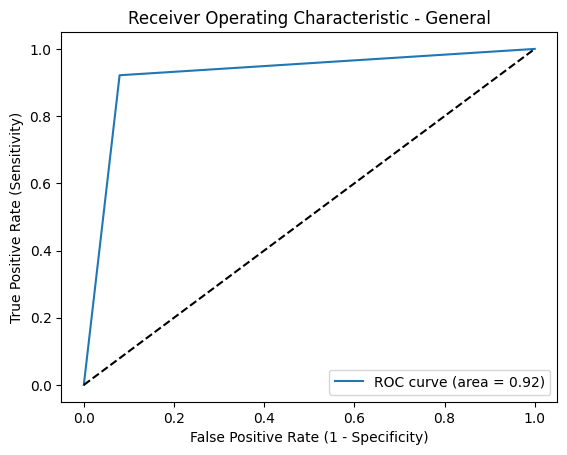

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic - General')
plt.legend(loc="lower right")

plt.show()

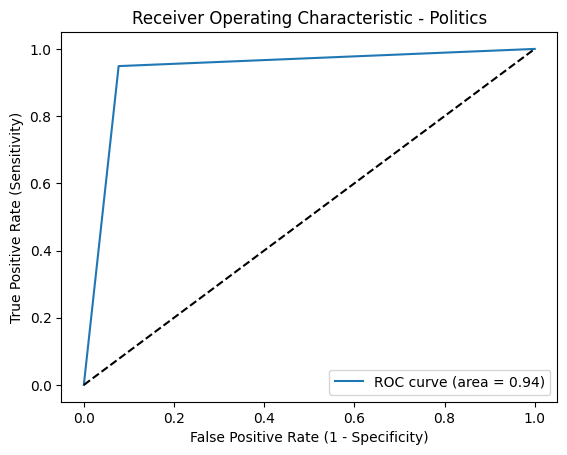

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic - Politics')
plt.legend(loc="lower right")

plt.show()

Pointwise prediction

In [ ]:
def predict_one(title, text, model):
  pass

## Deep learning - LSTM

Imports

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Activation, Dropout, Input
from keras.optimizers import Adam, RMSprop
from keras.utils import pad_sequences, plot_model

1. Tokenize data

In [ ]:
#Model constants
MAX_LEN = 3000
MAX_FEATURES = 500

In [ ]:
general_df2 = general_df.copy()
general_df2['combined_text'] = general_df['title'] + ' ' + general_df['author'] + ' ' + general_df['text']
X_LSTM = general_df2['combined_text']
y_LSTM = general_df2['label']

In [ ]:
tokenizer = Tokenizer(num_words = MAX_FEATURES)
tokenizer.fit_on_texts(X_LSTM)
X_seq = tokenizer.texts_to_sequences(X_LSTM)
X_padded = pad_sequences(X_seq, maxlen = MAX_LEN)

X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X_padded, y_LSTM, test_size=0.2, random_state=42)

In [ ]:
print(X_train_LSTM.shape, X_test_LSTM.shape, y_train_LSTM.shape, y_test_LSTM.shape)

(23899, 3000) (5975, 3000) (23899,) (5975,)


In [ ]:
politics_df2 = politics_df.copy()
politics_df2['combined_text'] = politics_df['title'] + ' ' + politics_df['author'] + ' ' + politics_df['text']
X1_LSTM = politics_df2['combined_text']
y1_LSTM = politics_df2['label']

In [ ]:
tokenizer1 = Tokenizer(num_words = MAX_FEATURES)
tokenizer1.fit_on_texts(X1_LSTM)
X1_seq = tokenizer1.texts_to_sequences(X1_LSTM)
X1_padded = pad_sequences(X1_seq, maxlen = MAX_LEN)

X1_train_LSTM, X1_test_LSTM, y1_train_LSTM, y1_test_LSTM = train_test_split(X1_padded, y1_LSTM, test_size=0.2, random_state=42)

In [ ]:
print(X1_train_LSTM.shape, X1_test_LSTM.shape, y1_train_LSTM.shape, y1_test_LSTM.shape)

(14490, 3000) (3623, 3000) (14490,) (3623,)


2. Model creation

In [ ]:
## Model Constants
BATCH_SIZE = 64
EPOCHS = 6

In [ ]:
# Input Layer
inputs = Input(shape = [MAX_LEN])

# Embedding Layer - Converts the input sequence into a sequence of dense vectors
layer = Embedding(MAX_FEATURES, 50, input_length = MAX_LEN)(inputs)

# LSTM Layer
layer = LSTM(64)(layer)

# Dense Layer - Fully connected layer
layer = Dense(256)(layer)
layer = Activation('relu')(layer)

# Dropout Layer - Prevents overfitting
layer = Dropout(0.5)(layer)

# Output Layer
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs = inputs, outputs = layer)

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000)]            0         
                                                                 
 embedding (Embedding)       (None, 3000, 50)          25000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257   

General ATT model - tested with General test set

In [ ]:
# Train the model
history = model.fit(X_train_LSTM, y_train_LSTM, validation_data = (X_test_LSTM, y_test_LSTM), batch_size = BATCH_SIZE, epochs = EPOCHS)
scores = model.evaluate(X_test_LSTM, y_test_LSTM, verbose = 0)
print("General")
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/6
374/374 [==============================] - 46s 101ms/step - loss: 0.1458 - accuracy: 0.9429 - val_loss: 0.0657 - val_accuracy: 0.9797
Epoch 2/6
374/374 [==============================] - 39s 103ms/step - loss: 0.0733 - accuracy: 0.9774 - val_loss: 0.0768 - val_accuracy: 0.9781
Epoch 3/6
374/374 [==============================] - 37s 100ms/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 4/6
374/374 [==============================] - 36s 97ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0430 - val_accuracy: 0.9859
Epoch 5/6
374/374 [==============================] - 36s 96ms/step - loss: 0.0416 - accuracy: 0.9878 - val_loss: 0.0712 - val_accuracy: 0.9771
Epoch 6/6
374/374 [==============================] - 39s 103ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0347 - val_accuracy: 0.9911
General
Accuracy: 99.11%


Politics TT model - tested with Politics test set

In [ ]:
# Train the model
history = model.fit(X1_train_LSTM, y1_train_LSTM, validation_data = (X1_test_LSTM, y1_test_LSTM), batch_size = BATCH_SIZE, epochs = EPOCHS)
scores = model.evaluate(X1_test_LSTM, y1_test_LSTM, verbose = 0)
print("Politics")
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/6
227/227 [==============================] - 23s 99ms/step - loss: 0.2308 - accuracy: 0.9152 - val_loss: 0.0736 - val_accuracy: 0.9815
Epoch 2/6
227/227 [==============================] - 23s 101ms/step - loss: 0.0585 - accuracy: 0.9877 - val_loss: 0.0424 - val_accuracy: 0.9931
Epoch 3/6
227/227 [==============================] - 23s 100ms/step - loss: 0.0258 - accuracy: 0.9945 - val_loss: 0.0235 - val_accuracy: 0.9948
Epoch 4/6
227/227 [==============================] - 23s 99ms/step - loss: 0.0219 - accuracy: 0.9952 - val_loss: 0.0340 - val_accuracy: 0.9931
Epoch 5/6
227/227 [==============================] - 24s 104ms/step - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.0224 - val_accuracy: 0.9956
Epoch 6/6
227/227 [==============================] - 24s 105ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0253 - val_accuracy: 0.9956
Politics
Accuracy: 99.56%


General TT model - tested with Politics test set

In [ ]:
history = model.fit(X_train_LSTM, y_train_LSTM, validation_data = (X1_test_LSTM, y1_test_LSTM), batch_size = BATCH_SIZE, epochs = EPOCHS)
scores = model.evaluate(X1_test_LSTM, y1_test_LSTM, verbose = 0)
print("General tested with Politics test set")
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/6
374/374 [==============================] - 35s 95ms/step - loss: 0.0895 - accuracy: 0.9705 - val_loss: 0.9200 - val_accuracy: 0.7974
Epoch 2/6
374/374 [==============================] - 35s 94ms/step - loss: 0.0295 - accuracy: 0.9917 - val_loss: 1.7834 - val_accuracy: 0.5595
Epoch 3/6
374/374 [==============================] - 36s 95ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 1.7017 - val_accuracy: 0.6536
Epoch 4/6
374/374 [==============================] - 36s 96ms/step - loss: 0.0265 - accuracy: 0.9926 - val_loss: 1.9808 - val_accuracy: 0.6332
Epoch 5/6
374/374 [==============================] - 36s 96ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 2.2994 - val_accuracy: 0.5725
Epoch 6/6
374/374 [==============================] - 35s 94ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 2.2047 - val_accuracy: 0.6028
General tested with Politics test set
Accuracy: 60.28%


Politics TT model - tested with General test set

In [ ]:
history = model.fit(X1_train_LSTM, y1_train_LSTM, validation_data = (X_test_LSTM, y_test_LSTM), batch_size = BATCH_SIZE, epochs = EPOCHS)
scores = model.evaluate(X_test_LSTM, y_test_LSTM, verbose = 0)
print("Politics tested with General test set")
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/6
227/227 [==============================] - 26s 114ms/step - loss: 0.1451 - accuracy: 0.9484 - val_loss: 2.6020 - val_accuracy: 0.5982
Epoch 2/6
227/227 [==============================] - 25s 111ms/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 1.8776 - val_accuracy: 0.6711
Epoch 3/6
227/227 [==============================] - 23s 102ms/step - loss: 0.0139 - accuracy: 0.9970 - val_loss: 1.9205 - val_accuracy: 0.6020
Epoch 4/6
227/227 [==============================] - 24s 106ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 1.7096 - val_accuracy: 0.6653
Epoch 5/6
227/227 [==============================] - 25s 112ms/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 2.0538 - val_accuracy: 0.6089
Epoch 6/6
227/227 [==============================] - 24s 106ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 2.6596 - val_accuracy: 0.6283
Politics tested with General test set
Accuracy: 62.83%


3. Model evaluation

Confusion matrix

187/187 [==============================] - 7s 33ms/step


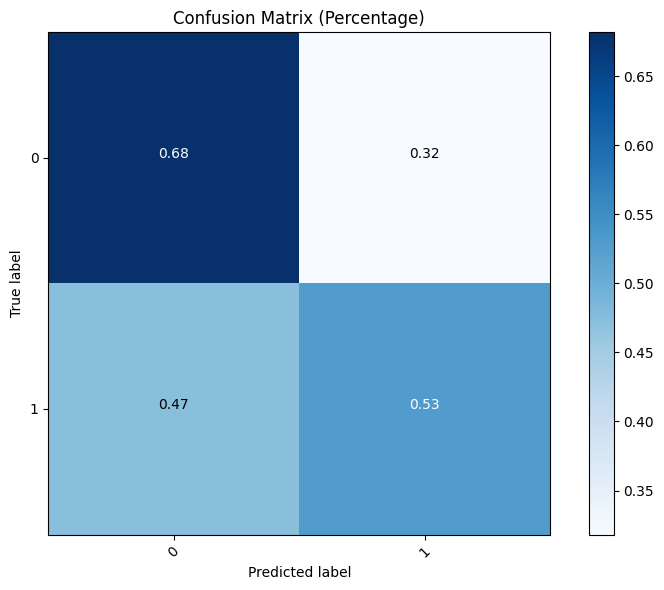

In [ ]:
y_pred = model.predict(X_test_LSTM)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test_LSTM, y_pred)

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Calculate percentages

    plt.imshow(cm_percentage, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Percentage)')
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm_percentage[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm_percentage[i, j] > 0.5 else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

labels = [0, 1]
plot_confusion_matrix(cm, labels)
plt.show()


Other graphs

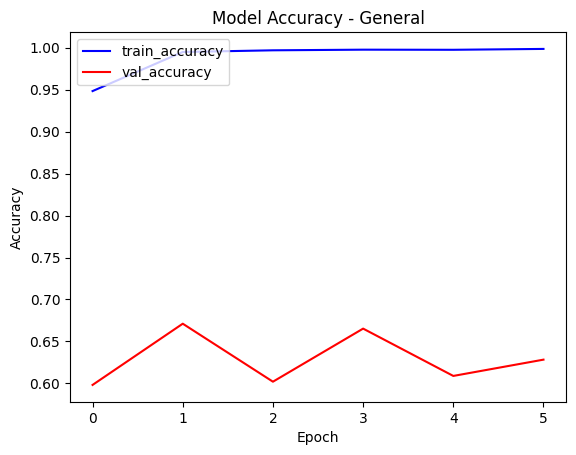

In [ ]:
# Plotting Model Accuracy
s, (at) = plt.subplots(1,1)
at.plot(history.history['accuracy'], c = 'b')
at.plot(history.history['val_accuracy'], c ='r')
at.set_title('Model Accuracy - General')
at.set_ylabel('Accuracy')
at.set_xlabel('Epoch')
at.legend(['train_accuracy', 'val_accuracy'], loc = 'upper left')
plt.show()

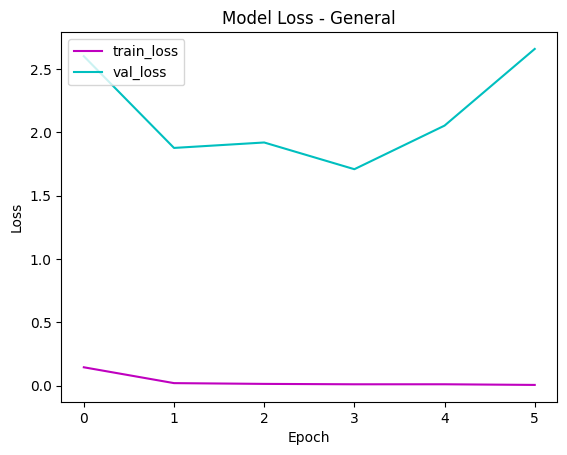

In [ ]:
# Plotting Model Loss
s, (al) = plt.subplots(1,1)
al.plot(history.history['loss'], c ='m')
al.plot(history.history['val_loss'], c ='c')
al.set_title('Model Loss - General')
al.set_ylabel('Loss')
al.set_xlabel('Epoch')
al.legend(['train_loss', 'val_loss'], loc = 'upper left')
plt.show()

# Test on fake news

### Naive Bayes

In [ ]:
# Step 1: Load the dataset
combined_fake_news_df = pd.read_csv('/content/drive/MyDrive/Seachain/Compiled Datasets/Fake/combined_fake_news.csv', encoding='utf-8', on_bad_lines='skip', engine="python")

# Step 2: Preprocess the dataset - ensure you apply the same preprocessing as your training data
# Rename the columns to match the training data
combined_fake_news_df.rename(columns={'Title': 'title', 'Body': 'text', 'Author': 'author'}, inplace=True)

# Drop the 'URL' column as it's not used in the training data
combined_fake_news_df.drop(columns=['URL'], inplace=True)

# If your dataset has columns 'title', 'author', and 'text', you would preprocess like this:
combined_fake_news_df.fillna('', inplace=True)
combined_fake_news_df['processed_text'] = combined_fake_news_df['title'] + ' ' + combined_fake_news_df['text']
apply_function(['processed_text'], [combined_fake_news_df], cleaning_URLs)
apply_function(['processed_text'], [combined_fake_news_df], clean1)
apply_function(['processed_text'], [combined_fake_news_df], cleaning_repeating_char)
apply_function(['processed_text'], [combined_fake_news_df], remove_stopwords)
apply_function(['processed_text'], [combined_fake_news_df], lemmatization)

# Step 3: Vectorize the text data
# Use the same vectorizer that was fitted on your training data, do not fit it again!
# If you saved your vectorizer to 'vectorizers2', you would do:
X_fake_news = vectorizers2.transform(combined_fake_news_df['processed_text'])

# Step 4: Use the trained model to make predictions
# If you saved your model to 'clf2', you would do:
y2_fake_pred = clf2.predict(X_fake_news)
y1_fake_pred = clf1.predict(X_fake_news)
y_fake_pred = clf.predict(X_fake_news)

# Step 5: Count the number of fake news predictions
# Assuming that '1' indicates fake news:
num_fake_news2 = (y2_fake_pred == 1).sum()
print(f"Number of fake news articles in 'combined_fake_news.csv' for general title + content: {num_fake_news2}")

num_fake_news1 = (y1_fake_pred == 1).sum()
print(f"Number of fake news articles in 'combined_fake_news.csv' for general + title + content: {num_fake_news1}")

num_fake_news = (y_fake_pred == 1).sum()
print(f"Number of fake news articles in 'combined_fake_news.csv' for polities only: {num_fake_news}")

Number of fake news articles in 'combined_fake_news.csv' for clf2: 967
Number of fake news articles in 'combined_fake_news.csv' for clf1: 867
Number of fake news articles in 'combined_fake_news.csv' for clf: 130


### LSTM

In [ ]:
# Assuming your imports and tokenizer setup are done earlier in the code

# Load the dataset
combined_fake_news_df = pd.read_csv('/content/drive/MyDrive/Seachain/Compiled Datasets/Fake/combined_fake_news.csv', encoding='utf-8', on_bad_lines='skip', engine="python")

# Preprocess the dataset
# Rename the columns to match the training data
combined_fake_news_df.rename(columns={'Title': 'title', 'Body': 'text', 'Author': 'author'}, inplace=True)

# Drop the 'URL' column as it's not used in the training data
combined_fake_news_df.drop(columns=['URL'], inplace=True)

# Fill NaN values with empty strings
combined_fake_news_df.fillna('', inplace=True)

# Apply the cleaning functions to the 'title' and 'text' columns
apply_function(['title', 'text'], [combined_fake_news_df], cleaning_URLs)
apply_function(['title', 'text'], [combined_fake_news_df], clean1)
apply_function(['title', 'text'], [combined_fake_news_df], cleaning_repeating_char)
apply_function(['title', 'text'], [combined_fake_news_df], remove_stopwords)
apply_function(['title', 'text'], [combined_fake_news_df], lemmatization)

# Combine 'title', 'author', and 'text' into a single column for LSTM processing
combined_fake_news_df['combined_text'] = combined_fake_news_df['title'] + ' ' + combined_fake_news_df['author'] + ' ' + combined_fake_news_df['text']

# Tokenize and pad the combined text
X_fake_news_seq = tokenizer.texts_to_sequences(combined_fake_news_df['combined_text'])
X_fake_news_padded = pad_sequences(X_fake_news_seq, maxlen=MAX_LEN)

# Predict with the LSTM model
y_fake_pred = (model.predict(X_fake_news_padded) > 0.5).astype(int)

# Count the number of fake news predictions
num_fake_news = y_fake_pred.sum()
print(f"Number of fake news articles in 'combined_fake_news.csv': {num_fake_news}")

# You might also want to reshape y_fake_pred if necessary


65/65 [==============================] - 2s 38ms/step
Number of fake news articles in 'combined_fake_news.csv': 469
